<a href="https://colab.research.google.com/github/NAVEED261/MY-AI-ASSISTANT/blob/main/2_2_chains_reducers_learn_applied_generative_ai_fundamentals_03_langchain_ecosystem_langgraph_course_notebooks_module_1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-1/chain.ipynb) [![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58238466-lesson-4-chain)

# Chain

# Review
Hum ne aik sada graph banaya hai jiss mein nodes, normal edges, aur conditional edges shamil hain.

# Goals
Ab chaliye aik sada chain tak pohanchte hain jiss mein 4 concepts ko milaya jaye:

Chat messages ko apni graph state ke taur par istemal karna.
Graph nodes mein chat models ko istemal karna.
Tools ko chat model se baandhna (bind karna).
Graph nodes mein tool calls ko execute karna.

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langchain-google-genai langchain_core langgraph

## Messages

Chat models messages ko istemal kar sakte hain, jiss se conversation mein mukhtalif roles capture ho jate hain.

LangChain mukhtalif message types ko support karta hai, jin mein shamil hain: HumanMessage, AIMessage, SystemMessage, aur ToolMessage.

Yeh sab kuch represent karte hain:

HumanMessage: User ki taraf se bheja gaya message.
AIMessage: Chat model ki taraf se bheja gaya message.
SystemMessage: Chat model ko kisi specific behavior ke liye instructions dene wala message.
ToolMessage: Tool call se aane wala message.
Chaliye ab messages ki aik list banaate hain.

Har message mein kuch cheezein shamil ho sakti hain:

content - message ka content (matn).
name - optional, message likhne wale ka naam.
response_metadata - optional, aik metadata ka dict (misal ke taur par, model provider ki taraf se AIMessage ke liye diya gaya metadata).


In [ ]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))
# yha model ka mtlb llm ha inshort chatgpt , gemnai etc etc
for m in messages:
    m.pretty_print()
    # jub b hm conversation krta ha to llm k pas is trh sa conversation jati ha

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


## Chat Models

Chat models messages ki aik sequence ko input ke taur par istemal kar sakte hain aur woh message types ko support karte hain, jaisa ke pehle discuss kiya gaya hai.

Bohat saare options hain chunne ke liye! Chaliye Gemini ke saath kaam karte hain.

Pehle yeh check kar lete hain ke aapka GEMINI_API_KEY set hai ya nahi, aur agar set nahi hai, toh aap se yeh enter karne ko kaha jaye ga.

In [ ]:
from google.colab import userdata
google_api_key = userdata.get('my_stenographer_key')

Hum aik chat model load kar sakte hain aur apni messages ki list ke saath isko invoke kar sakte hain.

Hum dekh sakte hain ke jo result milega woh aik AIMessage hoga, jiss mein specific response_metadata shamil hogi.



**Note:** Zaroori json key Google Cloud Console se hasil karein, instructions ko follow karte hue jo step 21_langchain_ecosystem/langchain/-01_gemini_standalone/Gemini_API_python.ipynb file mein di gayi hain. Jaisay hi yeh key hasil ho jaye, isko Google Colab mein load karein taa ke project mein aagay barh sakein.

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=google_api_key)
result = llm.invoke(messages)
result

AIMessage(content="That's a great question!  While Orcas are found in both the Atlantic and Pacific Oceans, the best places to see them in the US are definitely in the **Pacific Northwest** and **Alaska**. \n\nHere's a breakdown:\n\n**Pacific Northwest:**\n\n* **San Juan Islands, Washington:**  This is one of the most popular and reliable places to see Orcas.  The waters around the islands are home to a resident population of Orcas that feed on salmon.  You can go on whale watching tours from various towns like Friday Harbor, Anacortes, and Seattle.\n* **Olympic Peninsula, Washington:** This area also has a good chance of spotting Orcas, especially near the Strait of Juan de Fuca.\n* **Oregon Coast:** While Orcas are less frequent here, you can still have a chance to see them, particularly in the fall when they follow salmon runs.\n\n**Alaska:**\n\n* **Southeast Alaska:** This region is a prime spot for Orcas. You can see them in the waters around Juneau, Ketchikan, and Sitka. \n* **Pr

In [ ]:
print(type(result))

<class 'langchain_core.messages.ai.AIMessage'>


In [ ]:
result.response_metadata

{'prompt_feedback': {'block_reason': 0, 'safety_ratings': []},
 'finish_reason': 'STOP',
 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT',
   'probability': 'NEGLIGIBLE',
   'blocked': False},
  {'category': 'HARM_CATEGORY_HATE_SPEECH',
   'probability': 'NEGLIGIBLE',
   'blocked': False},
  {'category': 'HARM_CATEGORY_HARASSMENT',
   'probability': 'NEGLIGIBLE',
   'blocked': False},
  {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT',
   'probability': 'NEGLIGIBLE',
   'blocked': False}]}

## Tools

Tools tab faidemand hote hain jab aap chahte hain ke model external systems se interact kare.

External systems (misal ke taur par, APIs) aam taur par ek khas input schema ya payload mangte hain, na ke natural language.

Jab hum ek API ko, misal ke taur par, tool ke taur par bind karte hain, toh hum model ko required input schema ka awareness dete hain.

Model user ke natural language input ke basis par decide karega ke kab kisi tool ko call karna hai.

Aur phir yeh output wapas karega jo ke tool ke schema ke mutabiq hoga.

Bohat se LLM providers tool calling ko support karte hain aur LangChain mein tool calling interface bohat simple hai.

Aap aasani se kisi bhi Python function ko pass kar sakte hain ChatModel.bind_tools(function) mein.

Let's showcase a simple example of tool calling!

The `multiply` function is our tool.

In [ ]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

llm_with_tools: ChatGoogleGenerativeAI = llm.bind_tools([multiply])
# llm upna bind_tool ko use kra or llm_with_tools jiski type ChatGoogleGenerativeAI
# ha sa integrate ho or multiply function ka response genertre kro.

In [ ]:
print(multiply(5,6))
# just chekc because this answer will generate by llm

30


Warning yeh indicate kar rahi hai ke title key andar hi generate ho rahi hai, mumkin hai ke yeh LangGraph ya Gemini integration ke andar ho jab tool bind ho raha hai, bajaye iske ke hum isko explicitly pass karein. Isliye is warning ko nazarandaz karein.

Agar hum ek input dein - misal ke taur par, "2 ko 3 se multiply karne ka jawab kya hai" - toh humein ek function_call wapas milta hai.

Yeh function_call ke andar specific arguments hain jo humare function ke input schema se match karte hain, saath hi function ka naam bhi jiska call karna hai.


{'name': 'multiply', 'arguments': '{"b": 3.0, "a": 2.0}'}

In [ ]:
llm_with_tools.invoke([HumanMessage(content=f"What is 2 multiplied by 3", name="Lance")])
# is zrea hama pora funnction or tool ki dono id b mili ha

AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply', 'arguments': '{"b": 3.0, "a": 2.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-c9eecf6d-d792-497f-9d77-4de8e10bb09b-0', tool_calls=[{'name': 'multiply', 'args': {'b': 3.0, 'a': 2.0}, 'id': '47dfc6c6-6b52-4cb5-9f49-b110a4f2870d', 'type': 'tool_call'}], usage_metadata={'input_tokens': 57, 'output_tokens': 18, 'total_tokens': 75, 'input_token_details': {'cache_read': 0}})

In [ ]:
function_call.additional_kwargs['function_call']

{'name': 'multiply', 'arguments': '{"b": 3.0, "a": 2.0}'}

In [ ]:
llm_with_tools.invoke([HumanMessage(content=f"What is 2 multiplied by 6", name="Lance")])
# again  islya check kya ha k dono id khi same to ni ki c na duplicate to ni banna li

AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply', 'arguments': '{"b": 6.0, "a": 2.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-4cb84246-c512-485e-82de-5514f603a8d2-0', tool_calls=[{'name': 'multiply', 'args': {'b': 6.0, 'a': 2.0}, 'id': '20ed82d1-ef63-4ebf-96ea-32b14f2bdaf8', 'type': 'tool_call'}], usage_metadata={'input_tokens': 57, 'output_tokens': 18, 'total_tokens': 75, 'input_token_details': {'cache_read': 0}})

## Using messages as state

in bunyaadon ko tayyar karne ke baad, ab hum apni graph state mein messages istemal kar sakte hain.

Chaliye apni state ko define karte hain, MessagesState, jisko hum aik TypedDict ke taur par define karenge jiss mein aik hi key hogi: messages.

messages aik list hai messages ki, jaisa ke hum ne upar define kiya tha (misal ke taur par, HumanMessage, waghera).

In [ ]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

class MessagesState(TypedDict):
    messages: list[AnyMessage]
    # yha only list ki type btai ha jisma koi b msg hoskta ha like as IA, HUMAN, TOOL, SYSTEM MSG.but ya over right hgoa
    #  means jub list ma "hi"karaga to  "by" likhahoga inshort overright hojaiga

## Reducers

Ab humare paas aik chhoti si problem hai!

Jaisa ke hum ne discuss kiya tha, har node humare state key messages ke liye aik naya value return karega.

Lekin, yeh naya value pichle messages value ko overwrite kar dega.

Jab humara graph run ho raha hai, toh hum chahte hain ke messages humare messages state key mein append ho jayein.

Hum yahan reducer functions ko istemal kar sakte hain iss masle ko hal karne ke liye.

Reducers humein specify karne dete hain ke state update kis tarah perform honi chahiye.

Agar koi reducer function specify na ho, toh assume kiya jata hai ke key ke updates usko overwrite kar denge jaisa ke hum pehle dekh chuke hain.

Lekin, messages ko append karne ke liye, hum pre-built add_messages reducer ko istemal kar sakte hain.

Yeh ensure karta hai ke koi bhi naya message purani messages list mein add ho jaye.

Hum bas apni messages key ko add_messages reducer function ke saath metadata ke taur par annotate kar dete hain.



In [ ]:
from typing import Annotated
# Kisi variable ki type ko kuch extra maloomat ya context ke saath samjhana.
# means user na age pochi but annotated ma age k sath month b btadi..3 year 5 mnth.
from langgraph.graph.message import add_messages
# new msg add kya
class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    # ager annotated use krainga list ma  to add_msg k sath old msg b maintain rha
    # ga or msg k variable ma store hojaiga

Chunki graph state mein messages ki aik list rakhna bohat aam baat hai, isi liye LangGraph ne aik pre-built MessagesState diya hai!

MessagesState kuch is tarah se define hota hai:

Pehle se bane hue single messages key ke saath.
Yeh aik AnyMessage objects ki list hoti hai.
Yeh add_messages reducer ko istemal karta hai.
Hum aam taur par MessagesState istemal karte hain kyunke yeh custom TypedDict define karne se kam verbose (mukhtasir) hai, jaisa ke hum ne upar dikhaya.

In [ ]:
from langgraph.graph import MessagesState

class msg_conversational_State(MessagesState):
    # Add any keys needed beyond messages, which is pre-built
    pass

To go a bit deeper, we can see how the `add_messages` reducer works in isolation.

In [ ]:
# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Lance")
                   ]
                  # porana msg chk kya
# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")
#  new msg chk kya
# Test
add_messages(initial_messages , new_message)
# dono ko print krwaya
#  add_msg jo hama pre-build milrha tha wo thk kam krrha ha ya ni yha ye chk krrha ha.


[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='aa1c6c11-3153-4b73-a939-98eb86e5a1ff'),
 HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='Lance', id='1d4d09fe-cf5a-4296-b17c-cf5da8f55305'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='13138869-00d2-444f-b889-924a0e869655')]

## Our graph

Now, lets use ` msg_conversational_State` with a graph.

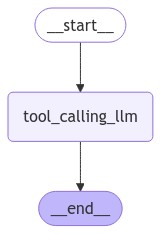

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph

# Node
def tool_calling_llm(state: msg_conversational_State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}
#
# Build graph
builder: StateGraph = StateGraph( msg_conversational_State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph: CompiledStateGraph  = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

Agar hum input mein "Hello!" dein, toh LLM tool calls ke baghair jawab deta hai.

In [ ]:
graph.invoke({"messages": HumanMessage(content="Hello im naveed!")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello im naveed!
================================== Ai Message ==================================

Hello Naveed! 👋  How can I help you today? 😊


The LLM chooses to use a tool when it determines that the input or task requires the functionality provided by that tool.

In [ ]:
messages = graph.invoke({"messages": HumanMessage(content="Multiply 4 and 2!")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Multiply 4 and 2!
================================== Ai Message ==================================
Tool Calls:
  multiply (e297790b-2280-47a2-afbb-dfaeb4ef6fdc)
 Call ID: e297790b-2280-47a2-afbb-dfaeb4ef6fdc
  Args:
    b: 2.0
    a: 4.0
